In [1]:
import os
print(os.getcwd())
try:
    os.chdir(r'F:\Dropbox\Work\Data\behavioral\attention\StatisticalRegularities\locations\Salience\Exp3\beh')
except:
    os.chdir('/Users/michlf/Dropbox/Work/Data/behavioral/attention/StatisticalRegularities/locations/Salience/Exp3/beh')
print(os.getcwd())

/Users/michlf/Documents/GitHub/tutorials
/Users/michlf/Dropbox/Work/Data/behavioral/attention/StatisticalRegularities/locations/Salience/Exp3/beh


In [2]:
import pandas as pd
fields = ['responseTime', 'subject_nr','cond_probLocation', 'correct', 'cond_disPresent',
          'cond_congruency', 'cond_disProbability','cond_salience'] # leave None if all columns are needed
noTrials = 1920 # if the dataset has an additional row (e.g. when questions were stored), leave None else

In [3]:
data = []
for i in range(1,len([s for s in os.listdir(os.getcwd()) if 'subject-' in s]) + 1):
    d = pd.read_csv('subject-{0}.csv'.format(i), sep=',', usecols=fields)
    if noTrials and len(d) > noTrials:
        d = d[:noTrials]
    data.append(d)

data = pd.concat(data, join='inner', ignore_index=True) # 'inner' to only get shared columns
data.tail()

,cond_congruency,cond_disPresent,cond_disProbability,cond_probLocation,cond_salience,correct,responseTime,subject_nr
46075,congruent,present,highProb,highProb,low,1,785.072146,24
46076,incongruent,present,lowProb3,lowProb,low,1,892.892868,24
46077,incongruent,present,lowProb3,lowProb,low,1,1076.990427,24
46078,incongruent,present,highProb,highProb,low,1,649.011542,24
46079,congruent,present,highProb,highProb,low,1,703.464712,24


In [4]:
import numpy as np
# Do some manual filters
data['RT < 200ms > 1200'] = np.where( (data['responseTime']<200) | (data['responseTime']>1200), 1, 0)
data.head()

,cond_congruency,cond_disPresent,cond_disProbability,cond_probLocation,cond_salience,correct,responseTime,subject_nr,RT < 200ms > 1200
0,incongruent,present,highProb,highProb,low,1,968.561721,1,0
1,incongruent,present,lowProb7,lowProb,low,1,655.416886,1,0
2,congruent,present,highProb,highProb,low,1,676.713878,1,0
3,congruent,absent,highProb,highProb,low,1,542.334847,1,0
4,incongruent,present,highProb,highProb,low,1,662.693238,1,0


In [5]:
# Save it
data.to_excel("allData.xlsx", index=False)

In [6]:
import matplotlib.pyplot as plt
dataDis = pd.pivot_table(data[ ( data.cond_disPresent == "present") & (data.correct == 1)],
                         values="responseTime", index="subject_nr", columns=["cond_salience", "cond_probLocation"])
dataDis

cond_salience            high                       low             
cond_probLocation    highProb      lowProb     highProb      lowProb
subject_nr                                                          
1                  558.540442   603.504492   601.013835   620.514106
2                  776.798191   782.241101   702.131677   730.405066
3                  923.947636   925.178294  1013.651024  1022.284284
4                  757.761054   809.097802   687.897484   770.222737
5                  842.273785   843.667753   820.353162   873.249699
6                  564.402397   605.081066   563.297345   597.464032
7                  865.489164   893.682657  1028.273568  1045.895590
8                  837.998023   935.639925   684.083620   738.477523
9                  782.103227   800.272884   908.154900   906.286709
10                 995.304695  1058.411674   868.308957   939.703542
11                 680.994514   699.387831   749.329384   775.846991
12                 751.942170   799.700752   609.555872   660.737078
13                 744.486445   809.077106   860.587459   915.956013
14                 636.671060   693.879105   630.770873   687.253966
15                 594.999824   621.140870   665.770544   680.187283
16                 907.724358   950.600438   838.194421   871.994144
17                 633.388156   681.138420   752.266146   802.027570
18                 861.155782   944.456090   748.867352   780.446218
19                 768.917447   780.543263   789.144298   816.980930
20                 671.452038   685.356908   625.392110   669.302901
21                 667.576475   735.721710   761.264077   813.253613
22                 902.701320  1011.315917   930.597614   974.086355
23                 931.848642   977.096693   986.411345   993.876708
24                 864.251185   943.829343   764.707606   794.139953

In [7]:
dataDis = pd.melt( dataDis.reset_index(),id_vars="subject_nr", value_name="responseTime")
dataDis

,subject_nr,cond_salience,cond_probLocation,responseTime
0,1,high,highProb,558.540442
1,2,high,highProb,776.798191
2,3,high,highProb,923.947636
3,4,high,highProb,757.761054
4,5,high,highProb,842.273785
5,6,high,highProb,564.402397
6,7,high,highProb,865.489164
7,8,high,highProb,837.998023
8,9,high,highProb,782.103227
9,10,high,highProb,995.304695


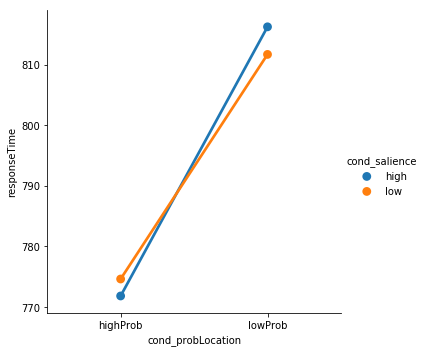

In [8]:
import seaborn as sns
ax = sns.catplot(x="cond_probLocation", y="responseTime", hue="cond_salience", kind="point",
            ci=None, units="responseTime", data=dataDis)